# Machine Problem No. 3: K-Nearest Neighbors (KNN) Classifier on Breast Cancer Diagnosis Dataset

# 1. Data Exploration and Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop columns that are irrelevant or contain too many missing values
# For example, 'id' and 'Unnamed: 32' might be irrelevant
df = df.drop(columns=['id', 'Unnamed: 32'])

# Convert categorical target variable (diagnosis) into numerical form
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target variable
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Normalize or scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData preprocessing completed.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

# 2. Model Development

In [2]:
# Import necessary libraries for modeling and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Implement and train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Step 2: Implement and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg.predict(X_test)

# Step 3: Evaluate and compare both models
# KNN Evaluation
print("K-Nearest Neighbors (KNN) Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Logistic Regression Evaluation
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg) * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy: 94.74%
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Logistic Regression Model Evaluation:
Accuracy: 97.37%
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 3. Model Evaluation

In [3]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate K-Nearest Neighbors (KNN) Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Evaluate Logistic Regression Model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
confusion_logreg = confusion_matrix(y_test, y_pred_logreg)

# Present results for KNN
print("K-Nearest Neighbors (KNN) Model Evaluation:")
print(f"Accuracy: {accuracy_knn * 100:.2f}%")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-Score: {f1_knn:.2f}")
print("Confusion Matrix:")
print(confusion_knn)

# Present results for Logistic Regression
print("\nLogistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_logreg * 100:.2f}%")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1-Score: {f1_logreg:.2f}")
print("Confusion Matrix:")
print(confusion_logreg)


K-Nearest Neighbors (KNN) Model Evaluation:
Accuracy: 94.74%
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
Confusion Matrix:
[[68  3]
 [ 3 40]]

Logistic Regression Model Evaluation:
Accuracy: 97.37%
Precision: 0.98
Recall: 0.95
F1-Score: 0.96
Confusion Matrix:
[[70  1]
 [ 2 41]]


4. Report and Visualizations

### Detailed Report ###

1. Data Preprocessing:
   - Loaded the dataset and performed exploratory data analysis (EDA).
   - Handled missing values by dropping irrelevant columns.
   - Converted categorical target variable (diagnosis) to numerical (Malignant = 1, Benign = 0).
   - Scaled the features using StandardScaler.
   - Split the dataset into 80% training and 20% testing sets.

2. Model Development:
   - Implemented and trained K-Nearest Neighbors (KNN) model with n_neighbors=3.
   - Implemented and trained Logistic Regression model.

3. Model Evaluation:
   - Evaluated both models using accuracy, precision, recall, and F1-score.
   - Presented confusion matrices and classification reports for both models.


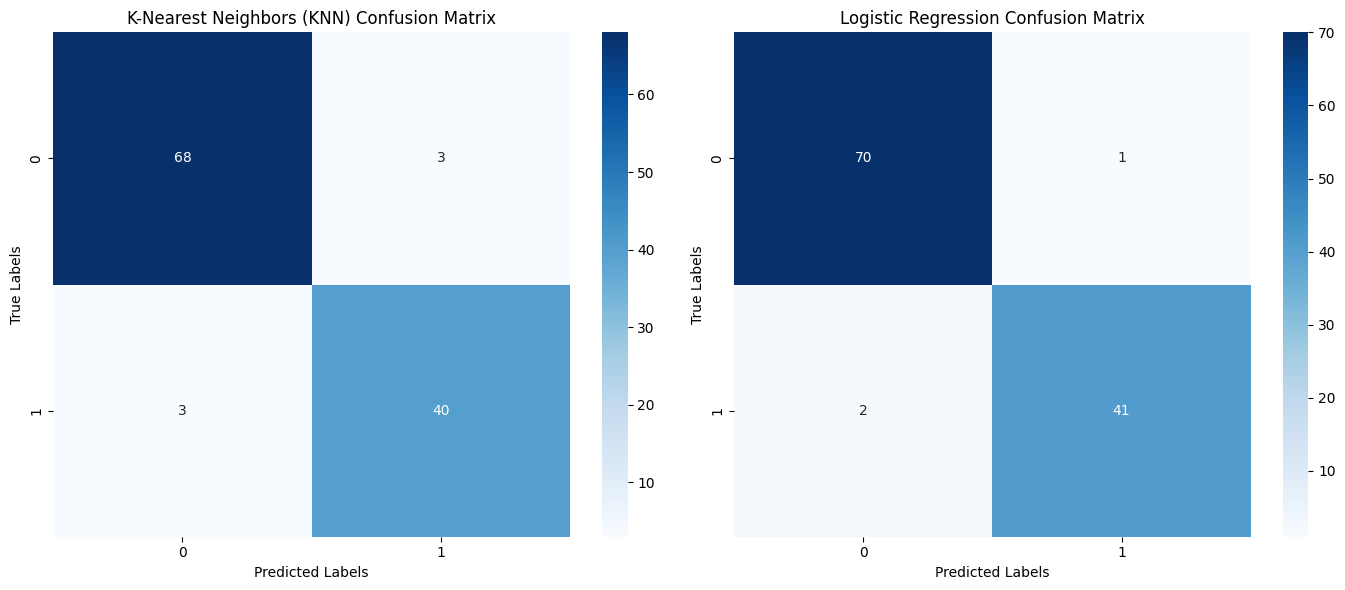


Classification Reports for KNN and Logistic Regression:
K-Nearest Neighbors (KNN) Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



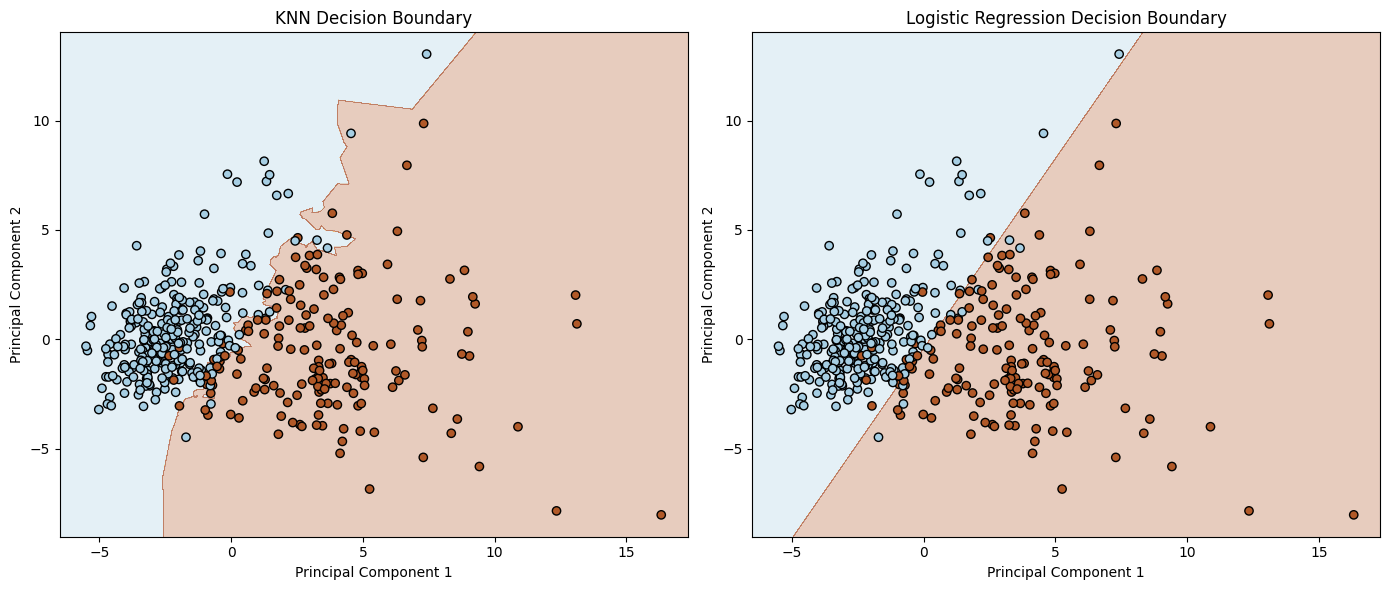

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Detailed Report
print("### Detailed Report ###")

# 1. Data Preprocessing
print("\n1. Data Preprocessing:")
print("   - Loaded the dataset and performed exploratory data analysis (EDA).")
print("   - Handled missing values by dropping irrelevant columns.")
print("   - Converted categorical target variable (diagnosis) to numerical (Malignant = 1, Benign = 0).")
print("   - Scaled the features using StandardScaler.")
print("   - Split the dataset into 80% training and 20% testing sets.")

# 2. Model Development
print("\n2. Model Development:")
print("   - Implemented and trained K-Nearest Neighbors (KNN) model with n_neighbors=3.")
print("   - Implemented and trained Logistic Regression model.")

# 3. Model Evaluation
print("\n3. Model Evaluation:")
print("   - Evaluated both models using accuracy, precision, recall, and F1-score.")
print("   - Presented confusion matrices and classification reports for both models.")

# Visualization of Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# KNN Confusion Matrix
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('K-Nearest Neighbors (KNN) Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_logreg, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Logistic Regression Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Visualization of Classification Reports
print("\nClassification Reports for KNN and Logistic Regression:")
print("K-Nearest Neighbors (KNN) Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# Visualization of Decision Boundaries
# Perform PCA for 2D visualization
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN and Logistic Regression on 2D data
knn.fit(X_train_pca, y_train)
logreg.fit(X_train_pca, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid for KNN and Logistic Regression
Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

Z_logreg = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z_logreg = Z_logreg.reshape(xx.shape)

# Plot decision boundaries
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# KNN Decision Boundary
ax[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap=plt.cm.Paired)
ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
ax[0].set_title('KNN Decision Boundary')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Logistic Regression Decision Boundary
ax[1].contourf(xx, yy, Z_logreg, alpha=0.3, cmap=plt.cm.Paired)
ax[1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
ax[1].set_title('Logistic Regression Decision Boundary')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
